# Determination of localization uncertainty
### Johanna Rahm, Sebastian Malkusch
#### Research group Heilemann
#### Institute for Physical and Theoretical Chemistry, Goethe University Frankfurt a.M.

## Load file

Insert the full file name & direcory path of the rapidSTORM localization file with .txt ending or browse for it. (Example path: F:\Marburg\single_colour_tracking\resting\160404_CS5_Cell1\cell_1_MMStack_Pos0.ome.tif.txt)

In [1]:
from pySPT.widgets import widgetDirectoryStructure
from pySPT.widgets import widgetColumnSort
from pySPT.widgets import widgetPrecision
from pySPT.preAnalysis import precision
widget_dir_structure = widgetDirectoryStructure.WidgetDirStructure()
widget_precision = widgetPrecision.WidgetPrecision()
precision = precision.Precision()
display(widget_precision.file_text_box, widget_precision.file_button)
widget_precision.file_button.on_click(widget_precision.open_file)
widget_precision.file_text_box.observe(widget_precision.change_file_box)

Text(value='path', description='Complete path', placeholder='Type something', style=DescriptionStyle(descripti…

Button(description='browse', style=ButtonStyle(), tooltip='browse for file')

## Run analysis

The mean position uncertainty is 19.308 nm in x and 18.732 nm in y direction.


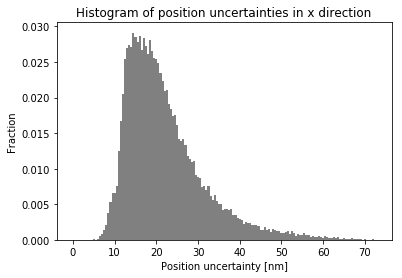

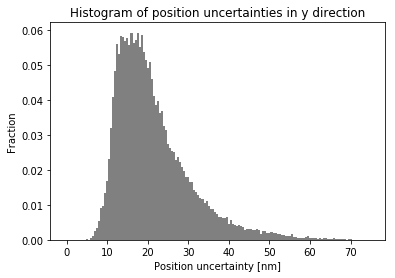

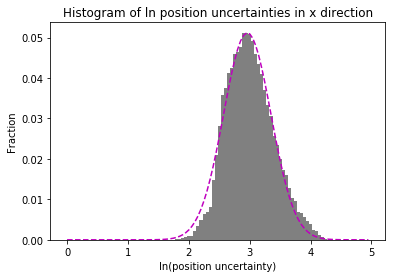

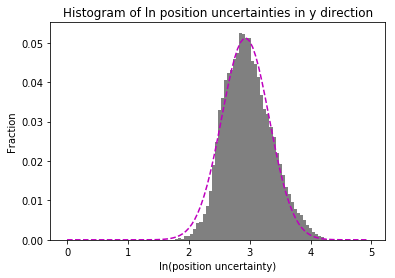

In [2]:
display(widget_precision.run_button)
def run_analysis(event):
    widget_precision.create_clear_output()
    if widget_precision.got_file_name:
        widget_column_sort = widgetColumnSort.WidgetColumnSort(widget_precision.file_text_box.value, "rapidSTORM", ['"Position-0-0-uncertainty"', '"Position-1-0-uncertainty"'])
        widget_column_sort.run_column_sort()
        precision.file_name = widget_precision.file_text_box.value
        precision.column_order = widget_column_sort.column_order
        precision.run_precision()
widget_precision.run_button.on_click(run_analysis)

## Save

The results will be saved in five .txt files (one for each histogram and one for the localization precision).

In [3]:
display(widget_precision.save_button)
def save_analysis(event):
    widget_precision.clear_output
    widget_dir_structure.name_handling(widget_precision.file_name)
    widget_dir_structure.create_raw_base_name()
    widget_dir_structure.create_folder()
    precision.save_precision(widget_dir_structure.pre_analysis_dir, widget_dir_structure.raw_base_name)
widget_precision.save_button.on_click(save_analysis)

Button(description='save', style=ButtonStyle(), tooltip='save the results')